In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso
from sklearn.preprocessing import StandardScaler
import joblib

---
## Phase 1: Data Preparation
This phase is all about getting our data ready for machine learning. We start by loading the main dataset, which contains radiomic features and patient information. The first step in cleaning is to remove irrelevant columns like folder paths, diagnostic versions, and certain shape features that aren't useful for our analysis.

Next, we segregate the data by gender. This is important because we'll be performing separate, stratified splits for male and female patients to ensure the distribution of "Bone Age" (our target variable) is maintained within each group. This helps prevent bias and improves model reliability.

After separating by gender, we define our predictor variables (X) and the target variable (y) ("Bone Age"). Then, using a stratified shuffle split, we divide both the female and male datasets into training, validation, and test sets. This stratification guarantees that the age distribution in each subset closely mirrors the original dataset, which is crucial for robust model evaluation.

Finally, we combine these gender-specific subsets to create unified training, validation, and test sets. To prepare the features for our models, we apply standardization, scaling them to a consistent range. We conclude this phase by visualizing the distribution of the target variable across our new sets, confirming that the data is well-prepared and balanced for the next steps in our machine learning pipeline.

---

In [4]:
import pandas as pd

merged_df=pd.read_csv('..\data\dicom_radiomics_merged_otsu.csv', sep=',')

In [5]:
merged_df["Edad Ósea(días)"]

0      4929
1      2738
2      4017
3      4383
4      3226
       ... 
469    4929
470    4017
471    1461
472    2677
473    1946
Name: Edad Ósea(días), Length: 474, dtype: int64

In [6]:

data_df=merged_df.copy()
data_df.drop(columns=["Folder"], inplace=True)
#data_df.drop(columns=["Folder_x"], inplace=True)
#data_df.drop(columns=["Folder_y"], inplace=True)
#data_df.drop(columns=["diagnostics_Versions_PyRadiomics_2"], inplace=True)

data_df.drop(columns=["diagnostics_Versions_PyRadiomics"], inplace=True)
data_df.drop(columns=["Indicativo"], inplace=True)
data_df.drop(columns=["original_shape_Flatness"], inplace=True)
data_df.drop(columns=["original_shape_LeastAxisLength"], inplace=True)

masculinos = data_df[data_df["Género(0; 1)"] == 0].copy()
femeninos = data_df[data_df["Género(0; 1)"] == 1].copy()

# Copia y limpieza del dataframe
data_df = merged_df.copy()
data_df.drop(columns=["Indicativo", "original_shape_Flatness", 
                        "original_shape_LeastAxisLength", 
                        "diagnostics_Versions_PyRadiomics", 
                        "Folder"], inplace=True)

# Variables predictoras y objetivo
y = data_df["Edad Ósea(días)"].copy().values
X = data_df.drop(columns=["Edad Ósea(días)"]).copy().values


In [7]:


y_f = femeninos["Edad Ósea(días)"].copy().values
X_f = femeninos.drop(columns=["Edad Ósea(días)"]).values

#splot
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_f)
y_binned = pd.qcut(y_series, q=7, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_f, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]
    

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_fg = x_train.copy()
x_test_fg = x_test.copy()
x_validation_fg = x_validation.copy()

y_train_f = y_train.copy()
y_test_f = y_test.copy()
y_validation_f = y_validation.copy()

x_train_f = x_train.copy()
x_test_f = x_test.copy()
x_validation_f = x_validation.copy()


y_m = masculinos["Edad Ósea(días)"].copy().values
X_m = masculinos.drop(columns=["Edad Ósea(días)"]).copy().values

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_m)
y_binned = pd.qcut(y_series, q=10, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_m, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]


print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_mg = x_train.copy()
x_test_mg = x_test.copy()
x_validation_mg = x_validation.copy()

y_train_m = y_train.copy()
y_test_m = y_test.copy()
y_validation_m = y_validation.copy()

x_train_m = x_train.copy()
x_test_m = x_test.copy()
x_validation_m = x_validation.copy()


# Combinar los conjuntos de entrenamiento
x_train = np.concatenate([x_train_f, x_train_m], axis=0)
y_train = np.concatenate([y_train_f, y_train_m], axis=0)

# Combinar los conjuntos de validación
x_validation = np.concatenate([x_validation_f, x_validation_m], axis=0)
y_validation = np.concatenate([y_validation_f, y_validation_m], axis=0)

# Combinar los conjuntos de prueba
x_test = np.concatenate([x_test_f, x_test_m], axis=0)
y_test = np.concatenate([y_test_f, y_test_m], axis=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_validation = scaler.transform(x_validation)





print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

The dimension of x_train is (155, 100)
The dimension of x_test is (49, 100)
The dimension of x_train is (147, 100)
The dimension of x_test is (47, 100)
The dimension of x_train is (302, 100)
The dimension of x_test is (96, 100)


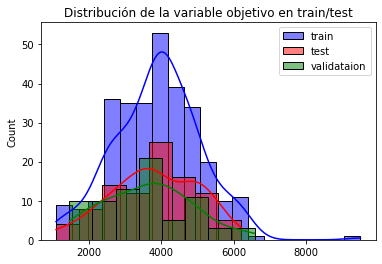

In [8]:
import seaborn as sns
sns.histplot(y_train, color='blue', label='train', kde=True)
sns.histplot(y_test, color='red', label='test', kde=True)
sns.histplot(y_validation, color='green', label='validataion', kde=True)
plt.legend()
plt.title("Distribución de la variable objetivo en train/test")
plt.show()

In [9]:
print("Train set size: ", len(y_train))
print("Validation set size: ", len(y_validation))
print("Test set size: ", len(y_test))
print("Total: ", len(y_train) + len(y_validation) + len(y_test))


Train set size:  302
Validation set size:  76
Test set size:  96
Total:  474


---
## Phase 2: Model Definition and Training

This phase is dedicated to defining, training, and evaluating various machine learning models to predict bone age. The process is systematically applied across three scenarios: first for a general model (using the combined male and female data), then specifically for male data, and finally for female data. This allows for the development of both universal and gender-specific predictive capabilities.

---

In [10]:
#Model
lr = LinearRegression()

#Fit model
lr.fit(x_train, y_train)

#predict
#prediction = lr.predict(x_test)

#actual
actual = y_test

train_score_lr = lr.score(x_train, y_train)
test_score_lr = lr.score(x_test, y_test)

print("The train score for lr model is {}".format(train_score_lr))
print("The test score for lr model is {}".format(test_score_lr))


#Ridge Regression Model
ridgeReg = Ridge(alpha=10)

ridgeReg.fit(x_train,y_train)

#train and test scorefor ridge regression
train_score_ridge = ridgeReg.score(x_train, y_train)
test_score_ridge = ridgeReg.score(x_test, y_test)

print("\nRidge Model............................................\n")
print("The train score for ridge model is {}".format(train_score_ridge))
print("The test score for ridge model is {}".format(test_score_ridge))

The train score for lr model is 0.9525092738493586
The test score for lr model is -365.0248315180198

Ridge Model............................................

The train score for ridge model is 0.8830385677915512
The test score for ridge model is 0.8590902405365506


In [11]:
#Lasso regression model

print("\nLasso Model............................................\n")
lasso = Lasso(alpha = 10)
lasso.fit(x_train,y_train)
train_score_ls =lasso.score(x_train,y_train)
test_score_ls =lasso.score(x_test,y_test)

print("The train score for ls model is {}".format(train_score_ls))
print("The test score for ls model is {}".format(test_score_ls))


Lasso Model............................................

The train score for ls model is 0.86822874843555
The test score for ls model is 0.8607517972726664


In [12]:
#Using the linear CV model
from sklearn.linear_model import LassoCV

#Lasso Cross validation
lasso_cv = LassoCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000,100000], random_state=0).fit(x_train, y_train)


#score
print(lasso_cv.score(x_train, y_train))
print(lasso_cv.score(x_test, y_test))

c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2336134.1401230134, tolerance: 33456.06308132781
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 12949584.118517179, tolerance: 33456.06308132781
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14756235.080319459, tolerance: 33456.06308132781
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did

0.86822874843555
0.8607517972726664


c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14326871.961352875, tolerance: 35380.990343801655
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14175310.834213926, tolerance: 35380.990343801655
  tol, rng, random, positive)


In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

metrics=[]
# Función para calcular y mostrar métricas
def calcular_metricas(y_true, y_pred, model, conjunto=''):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    metrics.append((model,conjunto, mae, mse, rmse, r2))
    print(f"--- Métricas para {conjunto} ---")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    print()
# Mostrar métricas
y_test_pred=lasso_cv.predict(x_test)
y_train_pred=lasso_cv.predict(x_train)
y_validation_pred=lasso_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test',model='LassoCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation')


--- Métricas para Train ---
MAE:  326.9278
MSE:  186753.3927
RMSE: 432.1497
R²:   0.8682

--- Métricas para Test ---
MAE:  353.1702
MSE:  195525.5619
RMSE: 442.1827
R²:   0.8608

--- Métricas para Validation ---
MAE:  314.0799
MSE:  159342.3039
RMSE: 399.1770
R²:   0.8905



In [14]:
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Set', 'MAE', 'MSE', 'RMSE', 'R2'])

In [15]:
metrics_df

,Model,Set,MAE,MSE,RMSE,R2
0,LassoCV Train,Train,326.927801,186753.392724,432.149734,0.868229
1,LassoCV Test,Test,353.170175,195525.561853,442.182725,0.860752
2,LassoCV Validation,Validation,314.079941,159342.303879,399.177033,0.890527


In [16]:
# Verificar resultados 
print ( "Características seleccionadas:" , lasso_cv.coef_) 
print ( "Interceptar:" , lasso_cv.intercept_)

Características seleccionadas: [ 139.86198     882.2456937    -0.         -217.91208231   -0.
  127.83590023   -0.           -0.          108.47718399  -28.62289253
 -304.5322971     0.           -0.            0.           -0.
   -0.          -53.75432426    0.           -0.           -0.
   -0.           -0.           -0.           -0.          -33.90849852
    0.           -0.           -0.          -40.45196157   -0.
   -0.           -0.           -0.            0.            0.
    0.           -0.           87.28595755    0.            0.
    0.            0.           -0.            0.           -0.
    0.            0.            0.            0.           88.9747182
    0.            0.            0.           -0.            0.
   -0.           -0.           -0.            0.           -0.
   -0.           -0.            0.            0.           -0.
   -0.            0.           -0.           -0.           -0.
    0.           -0.           -0.           -0.           -0.
 

In [17]:
data_copy=data_df.copy()
# Eliminar la columna de la variable objetivo
data_copy.drop(columns=["Edad Ósea(días)"], inplace=True)
# Crear un DataFrame con las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': data_copy.columns,
    'Coefficient': lasso_cv.coef_
})
# Filtrar las características con coeficientes no nulos
selected_features_g = selected_features[selected_features['Coefficient'] != 0]
# Ordenar por el valor absoluto del coeficiente
selected_features_g = selected_features_g.sort_values(by='Coefficient', key=abs, ascending=False)
# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features_g)


Características seleccionadas:
                                    Feature  Coefficient
1                    Edad Cronológica(días)   882.245694
10                original_shape_Sphericity  -304.532297
3            original_shape_MajorAxisLength  -217.912082
0                              Género(0; 1)   139.861980
5       original_shape_Maximum2DDiameterRow   127.835900
8                 original_shape_MeshVolume   108.477184
49                        original_glcm_Idn    88.974718
37                   original_glcm_Contrast    87.285958
16               original_firstorder_Energy   -53.754324
28             original_firstorder_Skewness   -40.451962
24              original_firstorder_Minimum   -33.908499
9            original_shape_MinorAxisLength   -28.622893
85              original_glszm_ZoneVariance   -13.318719
77  original_glszm_LowGrayLevelZoneEmphasis    -6.633830


In [18]:
#Using the linear CV model
from sklearn.linear_model import RidgeCV

#Lasso Cross validation
ridge_cv = RidgeCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000]).fit(x_train, y_train)

#score
print("The train score for ridge model is {}".format(ridge_cv.score(x_train, y_train)))
print("The test score for ridge model is {}".format(ridge_cv.score(x_test, y_test)))

The train score for ridge model is 0.8830385677915489
The test score for ridge model is 0.8590902405363061


In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mostrar métricas 
y_test_pred=ridge_cv.predict(x_test)
y_train_pred=ridge_cv.predict(x_train)
y_validation_pred=ridge_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation')


--- Métricas para Train ---
MAE:  314.8767
MSE:  165764.1103
RMSE: 407.1414
R²:   0.8830

--- Métricas para Test ---
MAE:  353.8101
MSE:  197858.6391
RMSE: 444.8130
R²:   0.8591

--- Métricas para Validation ---
MAE:  321.5571
MSE:  176829.8640
RMSE: 420.5114
R²:   0.8785



In [20]:
metrics_df = pd.DataFrame(metrics, columns=['Model', 'Set', 'MAE', 'MSE', 'RMSE', 'R2'])
metrics_df

,Model,Set,MAE,MSE,RMSE,R2
0,LassoCV Train,Train,326.927801,186753.392724,432.149734,0.868229
1,LassoCV Test,Test,353.170175,195525.561853,442.182725,0.860752
2,LassoCV Validation,Validation,314.079941,159342.303879,399.177033,0.890527
3,RidgeCV Train,Train,314.876704,165764.110331,407.141389,0.883039
4,RidgeCV Test,Test,353.810061,197858.639107,444.813038,0.859090
5,RidgeCV Validation,Validation,321.557076,176829.863971,420.511431,0.878512


In [21]:
# evaluate an xgboost regression model on the housing dataset
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
'''
# define model
model = XGBRegressor(objective ='reg:linear', 
                  n_estimators = 100, seed = 123) 
# define model evaluation method
cv = RepeatedKFold(n_splits=100, n_repeats=5, random_state=3)
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )
'''

"\n# define model\nmodel = XGBRegressor(objective ='reg:linear', \n                  n_estimators = 100, seed = 123) \n# define model evaluation method\ncv = RepeatedKFold(n_splits=100, n_repeats=5, random_state=3)\n# evaluate model\nscores = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)\n# force scores to be positive\nscores = absolute(scores)\nprint('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )\n"

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    seed=42,
    verbosity=0
)

scorer = make_scorer(r2_score)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # validación cruzada 3-fold
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Mejor combinación encontrada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación en el conjunto de validación y test
model_xgb_g = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'subsample': 0.8}


In [24]:
y_test_pred=model_xgb_g.predict(x_test)
y_train_pred=model_xgb_g.predict(x_train)
y_validation_pred=model_xgb_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation')

--- Métricas para Train ---
MAE:  1.8650
MSE:  7.2566
RMSE: 2.6938
R²:   1.0000

--- Métricas para Test ---
MAE:  119.5571
MSE:  68679.7824
RMSE: 262.0683
R²:   0.9511

--- Métricas para Validation ---
MAE:  101.6659
MSE:  53308.9751
RMSE: 230.8874
R²:   0.9634



In [25]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir función del modelo con hiperparámetros
def build_model(units_1=64, units_2=32, dropout_rate=0.0, l2_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(l2_rate)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units_2, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# KerasRegressor wrapper
regressor = KerasRegressor(model=build_model, verbose=0)

# Espacio de búsqueda (puede ser costoso computacionalmente con GridSearchCV)
param_grid = {
    "model__units_1": [64, 128],
    "model__units_2": [32, 64],
    "model__dropout_rate": [0.0, 0.3],
    "model__l2_rate": [0.0, 0.001],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [100, 200]
}

# Búsqueda por grilla
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=3, verbose=2, n_jobs=-1)

# Entrenamiento
grid_search.fit(x_train, y_train)

# Mejor modelo y evaluación
print("Best params:", grid_search.best_params_)
mlp_g = grid_search.best_estimator_
y_pred = mlp_g.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best params: {'batch_size': 16, 'epochs': 200, 'model__dropout_rate': 0.0, 'model__l2_rate': 0.0, 'model__learning_rate': 0.001, 'model__units_1': 128, 'model__units_2': 64}
MAE: 338.7041753133138
MSE: 243402.34955579197


In [26]:
y_test_pred=mlp_g.predict(x_test)
y_train_pred=mlp_g.predict(x_train)
y_validation_pred=mlp_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation')

--- Métricas para Train ---
MAE:  265.0338
MSE:  166794.1685
RMSE: 408.4044
R²:   0.8823

--- Métricas para Test ---
MAE:  338.7042
MSE:  243402.3496
RMSE: 493.3582
R²:   0.8267

--- Métricas para Validation ---
MAE:  273.8193
MSE:  125584.3004
RMSE: 354.3788
R²:   0.9137



In [27]:
#SVR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


# --- 4. Pipeline con GridSearchCV ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k=50)),  # Ajusta `k` si es necesario
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 1],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# --- 5. Entrenar búsqueda en conjunto entrenamiento completo ---
grid_search.fit(x_train, y_train)

# --- 6. Evaluar en conjunto de prueba ---
svr_g = grid_search.best_estimator_
y_pred = svr_g.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred)

# --- 7. Resultados ---
print("\n🧠 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("MAE en train set con mejor combinación:")
print(-grid_search.best_score_)
print(f"\n📊 MAE en test set: {mae_test:.2f} días")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

🧠 Mejores hiperparámetros encontrados:
{'svr__C': 10, 'svr__epsilon': 0.01, 'svr__kernel': 'linear'}
MAE en train set con mejor combinación:
376.4773549246332

📊 MAE en test set: 344.29 días


In [28]:
y_test_pred=svr_g.predict(x_test)
y_train_pred=svr_g.predict(x_train)
y_validation_pred=svr_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation')

--- Métricas para Train ---
MAE:  344.5198
MSE:  240374.1125
RMSE: 490.2796
R²:   0.8304

--- Métricas para Test ---
MAE:  344.2861
MSE:  190540.9063
RMSE: 436.5099
R²:   0.8643

--- Métricas para Validation ---
MAE:  320.7455
MSE:  175313.4673
RMSE: 418.7045
R²:   0.8796



In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --- Pipeline ---
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_dt = {
    'tree__max_depth': [3, 5, 7, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__max_leaf_nodes': [None, 5, 10, 20]
}

# GridSearchCV con validación 5-fold
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_dt.fit(x_train, y_train)

print("Best params for Decision Tree:", grid_search_dt.best_params_)
print("Best CV R²:", grid_search_dt.best_score_)

# Evaluar mejor modelo en test
decision_tree_g = grid_search_dt.best_estimator_
y_pred_dt = decision_tree_g.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_dt))
print("Test MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params for Decision Tree: {'tree__max_depth': None, 'tree__max_leaf_nodes': None, 'tree__min_samples_leaf': 2, 'tree__min_samples_split': 10}
Best CV R²: 0.8185780176401826
Test R²: 0.9082243249777778
Test MAE: 232.73305224867724
Test RMSE: 358.9804236667945


In [30]:
y_test_pred=decision_tree_g.predict(x_test)
y_train_pred=decision_tree_g.predict(x_train)
y_validation_pred=decision_tree_g.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation')

--- Métricas para Train ---
MAE:  119.6242
MSE:  42553.3807
RMSE: 206.2847
R²:   0.9700

--- Métricas para Test ---
MAE:  232.7331
MSE:  128866.9446
RMSE: 358.9804
R²:   0.9082

--- Métricas para Validation ---
MAE:  240.4384
MSE:  147473.0651
RMSE: 384.0222
R²:   0.8987



In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Pipeline con RandomForest ---
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # aunque no es obligatorio para RF
    ('rf', RandomForestRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__max_leaf_nodes': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.5, 0.7]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_rf.fit(x_train, y_train)

print("Best params for Random Forest:", grid_search_rf.best_params_)
print("Best CV R²:", grid_search_rf.best_score_)

# Evaluar mejor modelo en test
random_forest_g = grid_search_rf.best_estimator_
y_pred_rf = random_forest_g.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params for Random Forest: {'rf__max_depth': None, 'rf__max_features': 'auto', 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best CV R²: 0.8810785698640519
Test R²: 0.9363002979921914
Test MAE: 218.07907194151332
Test RMSE: 299.07194309610225


In [32]:
y_test_pred=random_forest_g.predict(x_test)
y_train_pred=random_forest_g.predict(x_train)
y_validation_pred=random_forest_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation')

--- Métricas para Train ---
MAE:  112.9365
MSE:  39261.2733
RMSE: 198.1446
R²:   0.9723

--- Métricas para Test ---
MAE:  218.0791
MSE:  89444.0271
RMSE: 299.0719
R²:   0.9363

--- Métricas para Validation ---
MAE:  239.0068
MSE:  122182.1941
RMSE: 349.5457
R²:   0.9161



In [33]:
scaler_m = StandardScaler()
x_train = scaler_m.fit_transform(x_train_m)
x_test = scaler_m.transform(x_test_m)
x_validation = scaler_m.transform(x_validation_m)

y_train = y_train_m.copy()
y_test = y_test_m.copy()
y_validation = y_validation_m.copy()

# Escalar características
x_train_g = scaler.transform(x_train_mg)
x_test_g = scaler.transform(x_test_mg)
x_validation_g = scaler.transform(x_validation_mg)

In [34]:
print("Train set size: ", len(y_train))
print("Validation set size: ", len(y_validation))
print("Test set size: ", len(y_test))
print("Total: ", len(y_train) + len(y_validation) + len(y_test))

Train set size:  147
Validation set size:  37
Test set size:  47
Total:  231


In [35]:
y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation Masculino')

--- Métricas para Train ---
MAE:  318.3891
MSE:  167898.3811
RMSE: 409.7540
R²:   0.8636

--- Métricas para Test ---
MAE:  375.7481
MSE:  185688.3858
RMSE: 430.9158
R²:   0.8683

--- Métricas para Validation ---
MAE:  267.4542
MSE:  122425.8323
RMSE: 349.8940
R²:   0.9240



In [36]:
y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation Masculino')

--- Métricas para Train ---
MAE:  309.2791
MSE:  153593.0490
RMSE: 391.9095
R²:   0.8752

--- Métricas para Test ---
MAE:  376.1907
MSE:  187880.1077
RMSE: 433.4514
R²:   0.8667

--- Métricas para Validation ---
MAE:  260.0015
MSE:  127146.1728
RMSE: 356.5756
R²:   0.9211



In [37]:
ridge_cv_m = RidgeCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000]).fit(x_train, y_train)
lasso_cv_m = LassoCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000], random_state=0).fit(x_train, y_train)

c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 600718.5245867148, tolerance: 14558.750381196583
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4011330.7160736546, tolerance: 14558.750381196583
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4898635.723078592, tolerance: 14558.750381196583
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective di

In [38]:

y_test_pred=ridge_cv_m.predict(x_test)
y_train_pred=ridge_cv_m.predict(x_train)
y_validation_pred=ridge_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_M Validation Masculino')

print("Lasso Masculino")
y_test_pred=lasso_cv_m.predict(x_test)
y_train_pred=lasso_cv_m.predict(x_train)
y_validation_pred=lasso_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_M Validation Masculino')

--- Métricas para Train ---
MAE:  285.1583
MSE:  130284.1340
RMSE: 360.9489
R²:   0.8941

--- Métricas para Test ---
MAE:  376.7630
MSE:  195843.8962
RMSE: 442.5425
R²:   0.8611

--- Métricas para Validation ---
MAE:  264.4500
MSE:  125634.8112
RMSE: 354.4500
R²:   0.9220

Lasso Masculino
--- Métricas para Train ---
MAE:  312.5484
MSE:  163417.1837
RMSE: 404.2489
R²:   0.8672

--- Métricas para Test ---
MAE:  359.7523
MSE:  177880.2759
RMSE: 421.7586
R²:   0.8738

--- Métricas para Validation ---
MAE:  248.3266
MSE:  107117.3905
RMSE: 327.2879
R²:   0.9335



In [39]:
#  Verificar resultados 
print ( "Características seleccionadas:" , lasso_cv_m.coef_) 
print ( "Interceptar:" , lasso_cv_m.intercept_)

Características seleccionadas: [ 111.18890448  821.36115228   -0.         -233.52707082  -43.59143744
   32.61247093   -0.           -0.          164.13108555   -0.
 -280.1472201     0.           -0.            0.           -0.
   -0.           -0.            0.           -0.           -0.
    0.            0.           -0.           -0.           -0.
    9.60265527   -0.           -0.           -0.           -0.
   -0.           -0.           -0.           -0.            0.
    0.           -0.           68.89808861   12.62624599    0.
    0.            0.           -0.            0.            0.
    0.           -0.           -0.           -0.            0.
   -0.            0.            0.           -0.           -0.
   -0.           -0.           -0.           -0.           -0.
    0.            0.            0.            0.            0.
    0.           -0.            0.           -0.            0.
   -0.           -0.           -0.           -0.            0.
   60.66365435  

In [40]:
data_copy=data_df.copy()
# Eliminar la columna de la variable objetivo
data_copy.drop(columns=["Edad Ósea(días)"], inplace=True)
# Crear un DataFrame con las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': data_copy.columns,
    'Coefficient': lasso_cv_m.coef_
})
# Filtrar las características con coeficientes no nulos
selected_features_m = selected_features[selected_features['Coefficient'] != 0]
# Ordenar por el valor absoluto del coeficiente
selected_features_m = selected_features_m.sort_values(by='Coefficient', key=abs, ascending=False)
# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features_m)


Características seleccionadas:
                                              Feature  Coefficient
1                              Edad Cronológica(días)   821.361152
10                          original_shape_Sphericity  -280.147220
3                      original_shape_MajorAxisLength  -233.527071
8                           original_shape_MeshVolume   164.131086
0                                        Género(0; 1)   111.188904
37                             original_glcm_Contrast    68.898089
75      original_glszm_LargeAreaHighGrayLevelEmphasis    60.663654
99  original_gldm_SmallDependenceLowGrayLevelEmphasis    44.917334
4              original_shape_Maximum2DDiameterColumn   -43.591437
5                 original_shape_Maximum2DDiameterRow    32.612471
38                          original_glcm_Correlation    12.626246
76       original_glszm_LargeAreaLowGrayLevelEmphasis    10.761889
25                          original_firstorder_Range     9.602655
94  original_gldm_LargeDependen

In [41]:
y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Masculino')

--- Métricas para Train ---
MAE:  1.7765
MSE:  6.5505
RMSE: 2.5594
R²:   1.0000

--- Métricas para Test ---
MAE:  98.8045
MSE:  61611.5518
RMSE: 248.2167
R²:   0.9563

--- Métricas para Validation ---
MAE:  103.6922
MSE:  38973.0884
RMSE: 197.4160
R²:   0.9758



In [42]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    seed=42,
    verbosity=0
)

scorer = make_scorer(r2_score)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # validación cruzada 3-fold
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Mejor combinación encontrada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación en el conjunto de validación y test
model_xgb_m = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.6}


In [43]:
y_test_pred=model_xgb_m.predict(x_test)
y_train_pred=model_xgb_m.predict(x_train)
y_validation_pred=model_xgb_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_m Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_m Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_m Validation Masculino')

--- Métricas para Train ---
MAE:  68.4502
MSE:  7524.5678
RMSE: 86.7443
R²:   0.9939

--- Métricas para Test ---
MAE:  386.0783
MSE:  214135.8045
RMSE: 462.7481
R²:   0.8481

--- Métricas para Validation ---
MAE:  331.1712
MSE:  166952.1172
RMSE: 408.5977
R²:   0.8963



In [44]:
y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Masculino')

--- Métricas para Train ---
MAE:  254.7618
MSE:  130668.7541
RMSE: 361.4813
R²:   0.8938

--- Métricas para Test ---
MAE:  355.1347
MSE:  227019.3019
RMSE: 476.4654
R²:   0.8390

--- Métricas para Validation ---
MAE:  227.9802
MSE:  94902.7225
RMSE: 308.0629
R²:   0.9411



In [45]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir función del modelo con hiperparámetros
def build_model(units_1=64, units_2=32, dropout_rate=0.0, l2_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(l2_rate)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units_2, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# KerasRegressor wrapper
regressor = KerasRegressor(model=build_model, verbose=0)

# Espacio de búsqueda (puede ser costoso computacionalmente con GridSearchCV)
param_grid = {
    "model__units_1": [64, 128],
    "model__units_2": [32, 64],
    "model__dropout_rate": [0.0, 0.3],
    "model__l2_rate": [0.0, 0.001],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [100, 200]
}

# Búsqueda por grilla
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=3, verbose=2, n_jobs=-1)

# Entrenamiento
grid_search.fit(x_train, y_train)

# Mejor modelo y evaluación
print("Best params:", grid_search.best_params_)
mlp_m = grid_search.best_estimator_
y_pred = mlp_m.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best params: {'batch_size': 16, 'epochs': 200, 'model__dropout_rate': 0.0, 'model__l2_rate': 0.0, 'model__learning_rate': 0.001, 'model__units_1': 128, 'model__units_2': 32}
MAE: 438.1337397149269
MSE: 292030.12300536514


In [46]:
y_test_pred=mlp_m.predict(x_test)
y_train_pred=mlp_m.predict(x_train)
y_validation_pred=mlp_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_m Validation')

--- Métricas para Train ---
MAE:  305.3939
MSE:  174801.3042
RMSE: 418.0925
R²:   0.8580

--- Métricas para Test ---
MAE:  438.1337
MSE:  292030.1230
RMSE: 540.3981
R²:   0.7929

--- Métricas para Validation ---
MAE:  313.0805
MSE:  159381.0664
RMSE: 399.2256
R²:   0.9010



In [47]:
y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Masculino')

--- Métricas para Train ---
MAE:  345.5913
MSE:  208693.4144
RMSE: 456.8297
R²:   0.8304

--- Métricas para Test ---
MAE:  356.6635
MSE:  189547.8829
RMSE: 435.3710
R²:   0.8656

--- Métricas para Validation ---
MAE:  256.4734
MSE:  115825.4180
RMSE: 340.3313
R²:   0.9281



In [48]:
#SVR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


# --- 4. Pipeline con GridSearchCV ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k=50)),  # Ajusta `k` si es necesario
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 1],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# --- 5. Entrenar búsqueda en conjunto entrenamiento completo ---
grid_search.fit(x_train, y_train)

# --- 6. Evaluar en conjunto de prueba ---
svr_m = grid_search.best_estimator_
y_pred = svr_m.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred)

# --- 7. Resultados ---
print("\n🧠 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("MAE en train set con mejor combinación:")
print(-grid_search.best_score_)
print(f"\n📊 MAE en test set: {mae_test:.2f} días")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

🧠 Mejores hiperparámetros encontrados:
{'svr__C': 10, 'svr__epsilon': 1, 'svr__kernel': 'linear'}
MAE en train set con mejor combinación:
455.84472539009573

📊 MAE en test set: 414.11 días


In [49]:
y_test_pred=svr_m.predict(x_test)
y_train_pred=svr_m.predict(x_train)
y_validation_pred=svr_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_m Validation')

--- Métricas para Train ---
MAE:  392.4547
MSE:  267811.5094
RMSE: 517.5051
R²:   0.7824

--- Métricas para Test ---
MAE:  414.1068
MSE:  245708.9368
RMSE: 495.6904
R²:   0.8257

--- Métricas para Validation ---
MAE:  355.2375
MSE:  198594.3489
RMSE: 445.6393
R²:   0.8767



In [50]:
y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Masculino')

--- Métricas para Train ---
MAE:  104.3833
MSE:  23068.5827
RMSE: 151.8835
R²:   0.9813

--- Métricas para Test ---
MAE:  230.6674
MSE:  110363.3714
RMSE: 332.2098
R²:   0.9217

--- Métricas para Validation ---
MAE:  278.1032
MSE:  209537.8136
RMSE: 457.7530
R²:   0.8699



In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --- Pipeline ---
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_dt = {
    'tree__max_depth': [3, 5, 7, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__max_leaf_nodes': [None, 5, 10, 20]
}

# GridSearchCV con validación 5-fold
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_dt.fit(x_train, y_train)

print("Best params for Decision Tree:", grid_search_dt.best_params_)
print("Best CV R²:", grid_search_dt.best_score_)

# Evaluar mejor modelo en test
decision_tree_m = grid_search_dt.best_estimator_
y_pred_dt = decision_tree_m.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_dt))
print("Test MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params for Decision Tree: {'tree__max_depth': 7, 'tree__max_leaf_nodes': 10, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 2}
Best CV R²: 0.6822639547709097
Test R²: 0.8012425153601552
Test MAE: 419.4589363894405
Test RMSE: 529.3772839180481


In [52]:
y_test_pred=decision_tree_m.predict(x_test)
y_train_pred=decision_tree_m.predict(x_train)
y_validation_pred=decision_tree_m.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_m Validation')

--- Métricas para Train ---
MAE:  292.7560
MSE:  143672.1224
RMSE: 379.0411
R²:   0.8833

--- Métricas para Test ---
MAE:  419.4589
MSE:  280240.3087
RMSE: 529.3773
R²:   0.8012

--- Métricas para Validation ---
MAE:  441.3757
MSE:  337399.9037
RMSE: 580.8613
R²:   0.7905



In [53]:
y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Masculino')

--- Métricas para Train ---
MAE:  101.3905
MSE:  22238.0885
RMSE: 149.1244
R²:   0.9819

--- Métricas para Test ---
MAE:  226.5575
MSE:  89414.7462
RMSE: 299.0230
R²:   0.9366

--- Métricas para Validation ---
MAE:  225.6433
MSE:  84086.3395
RMSE: 289.9764
R²:   0.9478



In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Pipeline con RandomForest ---
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # aunque no es obligatorio para RF
    ('rf', RandomForestRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__max_leaf_nodes': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.5, 0.7]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_rf.fit(x_train, y_train)

print("Best params for Random Forest:", grid_search_rf.best_params_)
print("Best CV R²:", grid_search_rf.best_score_)

# Evaluar mejor modelo en test
random_forest_m = grid_search_rf.best_estimator_
y_pred_rf = random_forest_m.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params for Random Forest: {'rf__max_depth': 10, 'rf__max_features': 0.7, 'rf__max_leaf_nodes': None, 'rf__min_samples_leaf': 2, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Best CV R²: 0.7798034942233443
Test R²: 0.8301993655764439
Test MAE: 406.4790390116684
Test RMSE: 489.29773985915824


In [55]:
y_test_pred=random_forest_m.predict(x_test)
y_train_pred=random_forest_m.predict(x_train)
y_validation_pred=random_forest_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_m Validation')

--- Métricas para Train ---
MAE:  207.7451
MSE:  72903.9104
RMSE: 270.0072
R²:   0.9408

--- Métricas para Test ---
MAE:  406.4790
MSE:  239412.2782
RMSE: 489.2977
R²:   0.8302

--- Métricas para Validation ---
MAE:  349.4610
MSE:  173635.4755
RMSE: 416.6959
R²:   0.8922



In [56]:
#Scale features f
scaler_f = StandardScaler()
x_train = scaler_f.fit_transform(x_train_f)
x_test = scaler_f.transform(x_test_f)
x_validation = scaler_f.transform(x_validation_f)

y_train = y_train_f.copy()
y_test = y_test_f.copy()
y_validation = y_validation_f.copy()

# Escalar características
x_train_g = scaler.transform(x_train_fg)
x_test_g = scaler.transform(x_test_fg)
x_validation_g = scaler.transform(x_validation_fg)


In [57]:
print("Train set size: ", len(y_train))
print("Validation set size: ", len(y_validation))
print("Test set size: ", len(y_test))
print("Total: ", len(y_train) + len(y_validation) + len(y_test))

Train set size:  155
Validation set size:  39
Test set size:  49
Total:  243


In [58]:
y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Ridge Train', model='RidgeCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Ridge Test', model='RidgeCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Ridge Validation', model='RidgeCV Validation Femenino')

y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Lasso Train', model='LassoCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Lasso Test', model='LassoCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Lasso Validation', model='LassoCV Validation Femenino')

--- Métricas para Ridge Train ---
MAE:  320.1854
MSE:  177306.9879
RMSE: 421.0784
R²:   0.8888

--- Métricas para Ridge Test ---
MAE:  332.3429
MSE:  207429.8835
RMSE: 455.4447
R²:   0.8483

--- Métricas para Ridge Validation ---
MAE:  379.9559
MSE:  223965.6735
RMSE: 473.2501
R²:   0.8019

--- Métricas para Lasso Train ---
MAE:  335.0258
MSE:  204635.2425
RMSE: 452.3663
R²:   0.8716

--- Métricas para Lasso Test ---
MAE:  331.5138
MSE:  204961.2205
RMSE: 452.7264
R²:   0.8501

--- Métricas para Lasso Validation ---
MAE:  358.3146
MSE:  194365.6231
RMSE: 440.8692
R²:   0.8281



In [59]:

ridge_cv_f = RidgeCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000]).fit(x_train, y_train)
lasso_cv_f = LassoCV(alphas = [0.0000001,0.000001,0.00001,0.0001, 0.001,0.01, 0.1, 1, 10,100,1000,10000], random_state=2,max_iter=10000,).fit(x_train, y_train)

c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 27079.282821051776, tolerance: 18947.463077419354
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2140296.23333079, tolerance: 18947.463077419354
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5236527.285243273, tolerance: 18947.463077419354
  tol, rng, random, positive)
c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did

In [60]:
print ( "Modelo Femenino RidgeCV")

y_test_pred=ridge_cv_f.predict(x_test)
y_train_pred=ridge_cv_f.predict(x_train)
y_validation_pred=ridge_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_F Validation')


print ( "Modelo Femenino LassoCV")
y_test_pred=lasso_cv_f.predict(x_test)
y_train_pred=lasso_cv_f.predict(x_train)
y_validation_pred=lasso_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_F Validation')

Modelo Femenino RidgeCV
--- Métricas para Train ---
MAE:  424.6353
MSE:  331741.7306
RMSE: 575.9703
R²:   0.7919

--- Métricas para Test ---
MAE:  457.3505
MSE:  384069.0113
RMSE: 619.7330
R²:   0.7192

--- Métricas para Validation ---
MAE:  505.5842
MSE:  414635.4414
RMSE: 643.9219
R²:   0.6332

Modelo Femenino LassoCV
--- Métricas para Train ---
MAE:  364.0908
MSE:  260927.3583
RMSE: 510.8105
R²:   0.8363

--- Métricas para Test ---
MAE:  353.2033
MSE:  187103.5206
RMSE: 432.5546
R²:   0.8632

--- Métricas para Validation ---
MAE:  375.3904
MSE:  197230.3199
RMSE: 444.1062
R²:   0.8255



In [61]:
#  Verificar resultados 
print ( "Características seleccionadas:" , lasso_cv_f.coef_) 
print ( "Interceptar:" , lasso_cv_f.intercept_)

Características seleccionadas: [  36.33570136  887.51402183   -0.            0.            0.
    0.            0.            0.            0.            0.
 -211.73275971    0.            0.            0.           -0.
   -0.           -0.           -0.           -0.           -0.
   -0.           -0.           -0.           -0.           -0.
   -0.           -0.           -0.           -0.           -0.
    0.            0.            0.            0.            0.
    0.            0.            0.            0.            0.
   -0.            0.            0.           -0.           -0.
    0.            0.           -0.            0.           -0.
    0.            0.           -0.            0.            0.
    0.            0.            0.            0.            0.
   -0.           -0.           -0.            0.           -0.
   -0.            0.           -0.            0.           -0.
    0.            0.            0.            0.           -0.
    0.           -0.    

In [62]:
data_copy=data_df.copy()
# Eliminar la columna de la variable objetivo
data_copy.drop(columns=["Edad Ósea(días)"], inplace=True)
# Crear un DataFrame con las características seleccionadas
selected_features = pd.DataFrame({
    'Feature': data_copy.columns,
    'Coefficient': lasso_cv_f.coef_
})
# Filtrar las características con coeficientes no nulos
selected_features = selected_features[selected_features['Coefficient'] != 0]
# Ordenar por el valor absoluto del coeficiente
selected_features_f = selected_features.sort_values(by='Coefficient', key=abs, ascending=False)
# Mostrar las características seleccionadas
print("Características seleccionadas:")
print(selected_features_f)


Características seleccionadas:
                      Feature  Coefficient
1      Edad Cronológica(días)   887.514022
10  original_shape_Sphericity  -211.732760
0                Género(0; 1)    36.335701


In [63]:
y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Femenino')

--- Métricas para Train ---
MAE:  1.9490
MSE:  7.9263
RMSE: 2.8154
R²:   1.0000

--- Métricas para Test ---
MAE:  139.4627
MSE:  75459.5137
RMSE: 274.6990
R²:   0.9448

--- Métricas para Validation ---
MAE:  99.7435
MSE:  66909.6881
RMSE: 258.6691
R²:   0.9408



In [64]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.metrics import make_scorer, r2_score
import numpy as np


dtrain_reg = xgb.DMatrix(x_train, y_train)
dtest_reg = xgb.DMatrix(x_test, y_test)
dvalidation_reg = xgb.DMatrix(x_validation, y_validation)
evals = [(dtrain_reg, "train"), (dtest_reg, "validation")]

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'subsample': [0.6, 0.8, 1.0],
}

xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    seed=42,
    verbosity=0
)

scorer = make_scorer(r2_score)

# Crear el GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring=scorer,
    cv=3,  # validación cruzada 3-fold
    verbose=2,
    n_jobs=-1
)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(x_train, y_train)

# Mejor combinación encontrada
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Evaluación en el conjunto de validación y test
model_xgb_f = grid_search.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Mejores hiperparámetros encontrados:
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'subsample': 0.8}


In [65]:
y_test_pred=model_xgb_f.predict(x_test)
y_train_pred=model_xgb_f.predict(x_train)
y_validation_pred=model_xgb_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_f Validation')

--- Métricas para Train ---
MAE:  83.3435
MSE:  10903.2168
RMSE: 104.4185
R²:   0.9932

--- Métricas para Test ---
MAE:  317.8846
MSE:  167012.1537
RMSE: 408.6712
R²:   0.8779

--- Métricas para Validation ---
MAE:  433.2215
MSE:  285016.0775
RMSE: 533.8690
R²:   0.7479



In [66]:
y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Femenino')

--- Métricas para Train ---
MAE:  274.7757
MSE:  201055.0454
RMSE: 448.3916
R²:   0.8739

--- Métricas para Test ---
MAE:  322.9443
MSE:  259116.7014
RMSE: 509.0351
R²:   0.8105

--- Métricas para Validation ---
MAE:  317.3076
MSE:  154692.4641
RMSE: 393.3096
R²:   0.8632



In [67]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Definir función del modelo con hiperparámetros
def build_model(units_1=64, units_2=32, dropout_rate=0.0, l2_rate=0.0, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(units_1, activation='relu', input_shape=(x_train.shape[1],), kernel_regularizer=l2(l2_rate)))
    if dropout_rate > 0:
        model.add(Dropout(dropout_rate))
    model.add(Dense(units_2, activation='relu', kernel_regularizer=l2(l2_rate)))
    model.add(Dense(1, activation='linear'))

    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_absolute_error')
    return model

# KerasRegressor wrapper
regressor = KerasRegressor(model=build_model, verbose=0)

# Espacio de búsqueda (puede ser costoso computacionalmente con GridSearchCV)
param_grid = {
    "model__units_1": [64, 128],
    "model__units_2": [32, 64],
    "model__dropout_rate": [0.0, 0.3],
    "model__l2_rate": [0.0, 0.001],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [16, 32],
    "epochs": [100, 200]
}

# Búsqueda por grilla
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid,
                           cv=3, verbose=2, n_jobs=-1)

# Entrenamiento
grid_search.fit(x_train, y_train)

# Mejor modelo y evaluación
print("Best params:", grid_search.best_params_)
mlp_f = grid_search.best_estimator_
y_pred = mlp_f.predict(x_test)
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))


Fitting 3 folds for each of 128 candidates, totalling 384 fits
Best params: {'batch_size': 16, 'epochs': 200, 'model__dropout_rate': 0.0, 'model__l2_rate': 0.0, 'model__learning_rate': 0.001, 'model__units_1': 64, 'model__units_2': 32}
MAE: 424.2083964445153
MSE: 335657.2548667089


In [68]:
y_test_pred=mlp_f.predict(x_test)
y_train_pred=mlp_f.predict(x_train)
y_validation_pred=mlp_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_f Validation')

--- Métricas para Train ---
MAE:  352.3034
MSE:  284574.8109
RMSE: 533.4555
R²:   0.8215

--- Métricas para Test ---
MAE:  424.2084
MSE:  335657.2549
RMSE: 579.3593
R²:   0.7546

--- Métricas para Validation ---
MAE:  439.6102
MSE:  288441.8584
RMSE: 537.0678
R²:   0.7449



In [69]:
y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Femenino')

--- Métricas para Train ---
MAE:  343.5036
MSE:  270419.6778
RMSE: 520.0189
R²:   0.8304

--- Métricas para Test ---
MAE:  332.4138
MSE:  191493.3981
RMSE: 437.5996
R²:   0.8600

--- Métricas para Validation ---
MAE:  381.7216
MSE:  231750.8473
RMSE: 481.4051
R²:   0.7950



In [70]:
#SVR

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error


# --- 4. Pipeline con GridSearchCV ---
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', SelectKBest(score_func=f_regression, k=50)),  # Ajusta `k` si es necesario
    ('svr', SVR())
])

param_grid = {
    'svr__kernel': ['linear', 'rbf', 'poly'],
    'svr__C': [0.1, 1, 10],
    'svr__epsilon': [0.01, 0.1, 1],
}

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=KFold(n_splits=5, shuffle=True, random_state=42),
    verbose=2,
    n_jobs=-1
)

# --- 5. Entrenar búsqueda en conjunto entrenamiento completo ---
grid_search.fit(x_train, y_train)

# --- 6. Evaluar en conjunto de prueba ---
svr_f = grid_search.best_estimator_
y_pred = svr_f.predict(x_test)
mae_test = mean_absolute_error(y_test, y_pred)

# --- 7. Resultados ---
print("\n🧠 Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)
print("MAE en train set con mejor combinación:")
print(-grid_search.best_score_)
print(f"\n📊 MAE en test set: {mae_test:.2f} días")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

🧠 Mejores hiperparámetros encontrados:
{'svr__C': 10, 'svr__epsilon': 1, 'svr__kernel': 'linear'}
MAE en train set con mejor combinación:
465.95054011453414

📊 MAE en test set: 378.05 días


In [71]:
y_test_pred=svr_f.predict(x_test)
y_train_pred=svr_f.predict(x_train)
y_validation_pred=svr_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_f Validation')

--- Métricas para Train ---
MAE:  394.1449
MSE:  327740.0072
RMSE: 572.4858
R²:   0.7944

--- Métricas para Test ---
MAE:  378.0545
MSE:  266376.8308
RMSE: 516.1171
R²:   0.8052

--- Métricas para Validation ---
MAE:  454.5897
MSE:  326215.6953
RMSE: 571.1530
R²:   0.7114



In [72]:
y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Femenino')

--- Métricas para Train ---
MAE:  134.0784
MSE:  61032.5118
RMSE: 247.0476
R²:   0.9617

--- Métricas para Test ---
MAE:  234.7144
MSE:  146615.2699
RMSE: 382.9037
R²:   0.8928

--- Métricas para Validation ---
MAE:  204.7051
MSE:  88591.1243
RMSE: 297.6426
R²:   0.9216



In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# --- Pipeline ---
pipeline_dt = Pipeline([
    ('scaler', StandardScaler()),
    ('tree', DecisionTreeRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_dt = {
    'tree__max_depth': [3, 5, 7, 10, None],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4],
    'tree__max_leaf_nodes': [None, 5, 10, 20]
}

# GridSearchCV con validación 5-fold
grid_search_dt = GridSearchCV(pipeline_dt, param_grid=param_grid_dt,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_dt.fit(x_train, y_train)

print("Best params for Decision Tree:", grid_search_dt.best_params_)
print("Best CV R²:", grid_search_dt.best_score_)

# Evaluar mejor modelo en test
decision_tree_f = grid_search_dt.best_estimator_
y_pred_dt = decision_tree_f.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_dt))
print("Test MAE:", mean_absolute_error(y_test, y_pred_dt))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Fitting 5 folds for each of 180 candidates, totalling 900 fits
Best params for Decision Tree: {'tree__max_depth': 5, 'tree__max_leaf_nodes': 10, 'tree__min_samples_leaf': 4, 'tree__min_samples_split': 2}
Best CV R²: 0.7194523538015876
Test R²: 0.8451006518784717
Test MAE: 368.62195185766615
Test RMSE: 460.2488893293818


In [74]:
y_test_pred=decision_tree_f.predict(x_test)
y_train_pred=decision_tree_f.predict(x_train)
y_validation_pred=decision_tree_f.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_f Validation')

--- Métricas para Train ---
MAE:  334.8756
MSE:  211317.4823
RMSE: 459.6928
R²:   0.8674

--- Métricas para Test ---
MAE:  368.6220
MSE:  211829.0401
RMSE: 460.2489
R²:   0.8451

--- Métricas para Validation ---
MAE:  532.4231
MSE:  452594.4096
RMSE: 672.7514
R²:   0.5996



In [75]:
y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Femenino')

--- Métricas para Train ---
MAE:  123.8865
MSE:  55405.8422
RMSE: 235.3845
R²:   0.9652

--- Métricas para Test ---
MAE:  209.9467
MSE:  89472.1130
RMSE: 299.1189
R²:   0.9346

--- Métricas para Validation ---
MAE:  251.6850
MSE:  158324.4151
RMSE: 397.9000
R²:   0.8600



In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# --- Pipeline con RandomForest ---
pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),  # aunque no es obligatorio para RF
    ('rf', RandomForestRegressor(random_state=42))
])

# Espacio de búsqueda de hiperparámetros
param_grid_rf = {
    'rf__n_estimators': [100, 200],
    'rf__max_depth': [5, 10, None],
    'rf__max_leaf_nodes': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__max_features': ['auto', 'sqrt', 0.5, 0.7]
}

grid_search_rf = GridSearchCV(pipeline_rf, param_grid=param_grid_rf,
                              cv=5, scoring='r2', n_jobs=-1, verbose=2)

# Ejecutar búsqueda
grid_search_rf.fit(x_train, y_train)

print("Best params for Random Forest:", grid_search_rf.best_params_)
print("Best CV R²:", grid_search_rf.best_score_)

# Evaluar mejor modelo en test
random_forest_f = grid_search_rf.best_estimator_
y_pred_rf = random_forest_f.predict(x_test)
print("Test R²:", r2_score(y_test, y_pred_rf))
print("Test MAE:", mean_absolute_error(y_test, y_pred_rf))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))

Fitting 5 folds for each of 864 candidates, totalling 4320 fits
Best params for Random Forest: {'rf__max_depth': 10, 'rf__max_features': 'auto', 'rf__max_leaf_nodes': 20, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 2, 'rf__n_estimators': 200}
Best CV R²: 0.793734245975086
Test R²: 0.8981160486996849
Test MAE: 297.2663151776011
Test RMSE: 373.26807230607386


In [77]:
y_test_pred=random_forest_f.predict(x_test)
y_train_pred=random_forest_f.predict(x_train)
y_validation_pred=random_forest_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_f Validation')

--- Métricas para Train ---
MAE:  230.2203
MSE:  135042.8237
RMSE: 367.4817
R²:   0.9153

--- Métricas para Test ---
MAE:  297.2663
MSE:  139329.0538
RMSE: 373.2681
R²:   0.8981

--- Métricas para Validation ---
MAE:  436.1948
MSE:  300516.6895
RMSE: 548.1940
R²:   0.7342



---
## Phase 3: Results Summary

This final phase compiles and presents the performance metrics of all trained models, both general and gender-specific. The goal is to provide a comprehensive overview of how well each model predicts bone age across different datasets (training, test, and validation) and to highlight which models perform best for the overall population, males, and females. It also includes steps for saving the trained models and scalers for future use.

---

In [78]:
print(metrics)

[('LassoCV Train', 'Train', 326.9278013382134, 186753.39272420143, 432.1497341480166, 0.86822874843555), ('LassoCV Test', 'Test', 353.17017516905366, 195525.5618531237, 442.1827245077805, 0.8607517972726664), ('LassoCV Validation', 'Validation', 314.07994107742735, 159342.3038788331, 399.17703325571364, 0.8905266696262087), ('RidgeCV Train', 'Train', 314.8767044680746, 165764.11033120105, 407.14138862464114, 0.8830385677915489), ('RidgeCV Test', 'Test', 353.8100610741374, 197858.63910700998, 444.8130383734384, 0.8590902405363061), ('RidgeCV Validation', 'Validation', 321.55707611381496, 176829.86397050548, 420.5114314385585, 0.8785121487064977), ('XGBoost Train', 'Train', 1.8650342928652732, 7.256601618861915, 2.6938080144772596, 0.9999948798173706), ('XGBoost Test', 'Test', 119.55713653564453, 68679.78237653337, 262.0682780813683, 0.9510880512553102), ('XGBoost Validation', 'Validation', 101.66590479800576, 53308.97507180881, 230.88736446979686, 0.9633750052693975), ('KerasRegressor T

In [80]:


y_f = femeninos["Edad Ósea(días)"].copy().values
X_f = femeninos.drop(columns=["Edad Ósea(días)"]).values

#splot
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_f)
y_binned = pd.qcut(y_series, q=7, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_f, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]
    

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_fg = x_train.copy()
x_test_fg = x_test.copy()
x_validation_fg = x_validation.copy()

y_train_f = y_train.copy()
y_test_f = y_test.copy()
y_validation_f = y_validation.copy()

x_train_f = x_train.copy()
x_test_f = x_test.copy()
x_validation_f = x_validation.copy()


y_m = masculinos["Edad Ósea(días)"].copy().values
X_m = masculinos.drop(columns=["Edad Ósea(días)"]).copy().values

import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

y_series = pd.Series(y_m)
y_binned = pd.qcut(y_series, q=10, labels=False, duplicates='drop')


sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_val_idx, test_idx in sss1.split(X_m, y_binned):
    x_train_full, x_test = X[train_val_idx], X[test_idx]
    y_train_full, y_test = y[train_val_idx], y[test_idx]
    y_binned_train_full = y_binned.iloc[train_val_idx]


sss2 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_idx, val_idx in sss2.split(x_train_full, y_binned_train_full):
    x_train, x_validation = x_train_full[train_idx], x_train_full[val_idx]
    y_train, y_validation = y_train_full[train_idx], y_train_full[val_idx]


print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape))

x_train_mg = x_train.copy()
x_test_mg = x_test.copy()
x_validation_mg = x_validation.copy()

y_train_m = y_train.copy()
y_test_m = y_test.copy()
y_validation_m = y_validation.copy()

x_train_m = x_train.copy()
x_test_m = x_test.copy()
x_validation_m = x_validation.copy()


# Combinar los conjuntos de entrenamiento
x_train = np.concatenate([x_train_f, x_train_m], axis=0)
y_train = np.concatenate([y_train_f, y_train_m], axis=0)

# Combinar los conjuntos de validación
x_validation = np.concatenate([x_validation_f, x_validation_m], axis=0)
y_validation = np.concatenate([y_validation_f, y_validation_m], axis=0)

# Combinar los conjuntos de prueba
x_test = np.concatenate([x_test_f, x_test_m], axis=0)
y_test = np.concatenate([y_test_f, y_test_m], axis=0)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_validation = scaler.transform(x_validation)

print("The dimension of x_train is {}".format(x_train.shape))
print("The dimension of x_test is {}".format(x_test.shape)) 


metrics=[]
# Función para calcular y mostrar métricas
def calcular_metricas(y_true, y_pred, model, conjunto=''):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    metrics.append((model,conjunto, mae, mse, rmse, r2))
    print(f"--- Métricas para {conjunto} ---")
    print(f"MAE:  {mae:.4f}")
    print(f"MSE:  {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")
    print()
# Mostrar métricas
y_test_pred=lasso_cv.predict(x_test)
y_train_pred=lasso_cv.predict(x_train)
y_validation_pred=lasso_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test',model='LassoCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Mostrar métricas 
y_test_pred=ridge_cv.predict(x_test)
y_train_pred=ridge_cv.predict(x_train)
y_validation_pred=ridge_cv.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation')


y_test_pred=model_xgb_g.predict(x_test)
y_train_pred=model_xgb_g.predict(x_train)
y_validation_pred=model_xgb_g.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation')


y_test_pred=mlp_g.predict(x_test)
y_train_pred=mlp_g.predict(x_train)
y_validation_pred=mlp_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation')
y_test_pred=svr_g.predict(x_test)
y_train_pred=svr_g.predict(x_train)
y_validation_pred=svr_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation')
y_test_pred=decision_tree_g.predict(x_test)
y_train_pred=decision_tree_g.predict(x_train)
y_validation_pred=decision_tree_g.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation')
y_test_pred=random_forest_g.predict(x_test)
y_train_pred=random_forest_g.predict(x_train)
y_validation_pred=random_forest_g.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation')

print(f"Total de registros masculinos: {len(masculinos)}")
print(f"Total de registros femeninos: {len(femeninos)}")

scaler_m = StandardScaler()
x_train = scaler_m.fit_transform(x_train_m)
x_test = scaler_m.transform(x_test_m)
x_validation = scaler_m.transform(x_validation_m)

y_train = y_train_m.copy()
y_test = y_test_m.copy()
y_validation = y_validation_m.copy()

# Escalar características
x_train_g = scaler.transform(x_train_mg)
x_test_g = scaler.transform(x_test_mg)
x_validation_g = scaler.transform(x_validation_mg)

# Mostrar métricas para train y test



y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV Validation Masculino')
y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV Validation Masculino')

y_test_pred=ridge_cv_m.predict(x_test)
y_train_pred=ridge_cv_m.predict(x_train)
y_validation_pred=ridge_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_M Validation Masculino')

print("Lasso Masculino")
y_test_pred=lasso_cv_m.predict(x_test)
y_train_pred=lasso_cv_m.predict(x_train)
y_validation_pred=lasso_cv_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_M Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_M Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_M Validation Masculino')

y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Masculino')

y_test_pred=model_xgb_m.predict(x_test)
y_train_pred=model_xgb_m.predict(x_train)
y_validation_pred=model_xgb_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_m Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_m Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_m Validation Masculino')

y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Masculino')

y_test_pred=mlp_m.predict(x_test)
y_train_pred=mlp_m.predict(x_train)
y_validation_pred=mlp_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_m Validation')
y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Masculino')

y_test_pred=svr_m.predict(x_test)
y_train_pred=svr_m.predict(x_train)
y_validation_pred=svr_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_m Validation')

y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Masculino')

y_test_pred=decision_tree_m.predict(x_test)
y_train_pred=decision_tree_m.predict(x_train)
y_validation_pred=decision_tree_m.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_m Validation')

y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Masculino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Masculino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Masculino')

y_test_pred=random_forest_m.predict(x_test)
y_train_pred=random_forest_m.predict(x_train)
y_validation_pred=random_forest_m.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_m Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_m Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_m Validation')


scaler_f = StandardScaler()
x_train = scaler_m.fit_transform(x_train_f)
x_test = scaler_m.transform(x_test_f)
x_validation = scaler_m.transform(x_validation_f)

y_train = y_train_f.copy()
y_test = y_test_f.copy()
y_validation = y_validation_f.copy()

# Escalar características
x_train_g = scaler.transform(x_train_fg) 
x_test_g = scaler.transform(x_test_fg)
x_validation_g = scaler.transform(x_validation_fg)


y_test_pred=ridge_cv.predict(x_test_g)
y_train_pred=ridge_cv.predict(x_train_g)
y_validation_pred=ridge_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Ridge Train', model='RidgeCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Ridge Test', model='RidgeCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Ridge Validation', model='RidgeCV Validation Femenino')

y_test_pred=lasso_cv.predict(x_test_g)
y_train_pred=lasso_cv.predict(x_train_g)
y_validation_pred=lasso_cv.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Lasso Train', model='LassoCV Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Lasso Test', model='LassoCV Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Lasso Validation', model='LassoCV Validation Femenino')

print ( "Modelo Femenino RidgeCV")

y_test_pred=ridge_cv_f.predict(x_test)
y_train_pred=ridge_cv_f.predict(x_train)
y_validation_pred=ridge_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='RidgeCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='RidgeCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='RidgeCV_F Validation')


print ( "Modelo Femenino LassoCV")
y_test_pred=lasso_cv_f.predict(x_test)
y_train_pred=lasso_cv_f.predict(x_train)
y_validation_pred=lasso_cv_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='LassoCV_F Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='LassoCV_F Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='LassoCV_F Validation')

y_test_pred=model_xgb_g.predict(x_test_g)
y_train_pred=model_xgb_g.predict(x_train_g)
y_validation_pred=model_xgb_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost Validation Femenino')

import xgboost as xgb
dtrain_reg = xgb.DMatrix(x_train, y_train)
dtest_reg = xgb.DMatrix(x_test, y_test)
dvalidation_reg = xgb.DMatrix(x_validation, y_validation)

y_test_pred=model_xgb_f.predict(x_test)
y_train_pred=model_xgb_f.predict(x_train)
y_validation_pred=model_xgb_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='XGBoost_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='XGBoost_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='XGBoost_f Validation')

y_test_pred=mlp_g.predict(x_test_g)
y_train_pred=mlp_g.predict(x_train_g)
y_validation_pred=mlp_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor Validation Femenino')

y_test_pred=mlp_f.predict(x_test)
y_train_pred=mlp_f.predict(x_train)
y_validation_pred=mlp_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='KerasRegressor_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='KerasRegressor_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='KerasRegressor_f Validation')

y_test_pred=svr_g.predict(x_test_g)
y_train_pred=svr_g.predict(x_train_g)
y_validation_pred=svr_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR Validation Femenino')
y_test_pred=svr_f.predict(x_test)
y_train_pred=svr_f.predict(x_train)
y_validation_pred=svr_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='SVR_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='SVR_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='SVR_f Validation')

y_test_pred=decision_tree_g.predict(x_test_g)
y_train_pred=decision_tree_g.predict(x_train_g)
y_validation_pred=decision_tree_g.predict(x_validation_g)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree Validation Femenino')

y_test_pred=decision_tree_f.predict(x_test)
y_train_pred=decision_tree_f.predict(x_train)
y_validation_pred=decision_tree_f.predict(x_validation)

calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Decision Tree_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Decision Tree_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Decision Tree_f Validation')

y_test_pred=random_forest_g.predict(x_test_g)
y_train_pred=random_forest_g.predict(x_train_g)
y_validation_pred=random_forest_g.predict(x_validation_g)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest Train Femenino')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest Test Femenino')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest Validation Femenino')

y_test_pred=random_forest_f.predict(x_test)
y_train_pred=random_forest_f.predict(x_train)
y_validation_pred=random_forest_f.predict(x_validation)
calcular_metricas(y_train, y_train_pred, conjunto='Train', model='Random Forest_f Train')
calcular_metricas(y_test, y_test_pred, conjunto='Test', model='Random Forest_f Test')
calcular_metricas(y_validation, y_validation_pred, conjunto='Validation', model='Random Forest_f Validation')


The dimension of x_train is (155, 100)
The dimension of x_test is (49, 100)
The dimension of x_train is (147, 100)
The dimension of x_test is (47, 100)
The dimension of x_train is (302, 100)
The dimension of x_test is (96, 100)
--- Métricas para Train ---
MAE:  326.9278
MSE:  186753.3927
RMSE: 432.1497
R²:   0.8682

--- Métricas para Test ---
MAE:  353.1702
MSE:  195525.5619
RMSE: 442.1827
R²:   0.8608

--- Métricas para Validation ---
MAE:  314.0799
MSE:  159342.3039
RMSE: 399.1770
R²:   0.8905

--- Métricas para Train ---
MAE:  314.8767
MSE:  165764.1103
RMSE: 407.1414
R²:   0.8830

--- Métricas para Test ---
MAE:  353.8101
MSE:  197858.6391
RMSE: 444.8130
R²:   0.8591

--- Métricas para Validation ---
MAE:  321.5571
MSE:  176829.8640
RMSE: 420.5114
R²:   0.8785

--- Métricas para Train ---
MAE:  1.8650
MSE:  7.2566
RMSE: 2.6938
R²:   1.0000

--- Métricas para Test ---
MAE:  119.5571
MSE:  68679.7824
RMSE: 262.0683
R²:   0.9511

--- Métricas para Validation ---
MAE:  101.6659
MSE:  5

In [81]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

columnas = ['Modelo', 'Tipo', 'mae', 'mse', 'rmse', 'r2']
df = pd.DataFrame(metrics, columns=columnas)



In [82]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
for modelo in df["Modelo"]:
    print(modelo)

LassoCV Train
LassoCV Test
LassoCV Validation
RidgeCV Train
RidgeCV Test
RidgeCV Validation
XGBoost Train
XGBoost Test
XGBoost Validation
KerasRegressor Train
KerasRegressor Test
KerasRegressor Validation
SVR Train
SVR Test
SVR Validation
Decision Tree Train
Decision Tree Test
Decision Tree Validation
Random Forest Train
Random Forest Test
Random Forest Validation
LassoCV Train Masculino
LassoCV Test Masculino
LassoCV Validation Masculino
RidgeCV Train Masculino
RidgeCV Test Masculino
RidgeCV Validation Masculino
RidgeCV_M Train Masculino
RidgeCV_M Test Masculino
RidgeCV_M Validation Masculino
LassoCV_M Train Masculino
LassoCV_M Test Masculino
LassoCV_M Validation Masculino
XGBoost Train Masculino
XGBoost Test Masculino
XGBoost Validation Masculino
XGBoost_m Train Masculino
XGBoost_m Test Masculino
XGBoost_m Validation Masculino
KerasRegressor Train Masculino
KerasRegressor Test Masculino
KerasRegressor Validation Masculino
KerasRegressor_m Train
KerasRegressor_m Test
KerasRegressor_m 

In [83]:
df

,Modelo,Tipo,mae,mse,rmse,r2
0,LassoCV Train,Train,326.927801,186753.392724,432.149734,0.868229
1,LassoCV Test,Test,353.170175,195525.561853,442.182725,0.860752
2,LassoCV Validation,Validation,314.079941,159342.303879,399.177033,0.890527
3,RidgeCV Train,Train,314.876704,165764.110331,407.141389,0.883039
4,RidgeCV Test,Test,353.810061,197858.639107,444.813038,0.859090
5,RidgeCV Validation,Validation,321.557076,176829.863971,420.511431,0.878512
6,XGBoost Train,Train,1.865034,7.256602,2.693808,0.999995
7,XGBoost Test,Test,119.557137,68679.782377,262.068278,0.951088
8,XGBoost Validation,Validation,101.665905,53308.975072,230.887364,0.963375
9,KerasRegressor Train,Train,265.033838,166794.168491,408.404418,0.882312


In [84]:
import pandas as pd

# Suponiendo que ya tenés un DataFrame llamado `df`

# Filtro 1: Modelos generales (sin "Masculino", "Femenino", "_m", "_f")
df_generales = df[~df["Modelo"].str.contains("Masculino|Femenino|_m|_f|_M|_F", regex=True)]


# Filtro 3: Modelos con sufijos "_m" o "_f"
df_genero_guionbajo = df[df["Modelo"].str.contains(r"_m|_f|_M|_F", regex=True)]

# Filtro 2: Modelos con "Masculino" o "Femenino" al final (puede tener espacios en medio)
df_genero_texto = df[
    (df["Modelo"].str.contains(r"(Masculino|Femenino)$", regex=True)) &
    (~df["Modelo"].str.contains(r"_m|_f|_M|_F", regex=True))
]



# Mostrar conteo de cada uno
print("Modelos generales:", len(df_generales))
print("Modelos con género (texto):", len(df_genero_texto))
print("Modelos con género (_m/_f):", len(df_genero_guionbajo))


Modelos generales: 21
Modelos con género (texto): 42
Modelos con género (_m/_f): 42


c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [85]:
for modelo in df_generales["Modelo"]:
    print(modelo)
    

LassoCV Train
LassoCV Test
LassoCV Validation
RidgeCV Train
RidgeCV Test
RidgeCV Validation
XGBoost Train
XGBoost Test
XGBoost Validation
KerasRegressor Train
KerasRegressor Test
KerasRegressor Validation
SVR Train
SVR Test
SVR Validation
Decision Tree Train
Decision Tree Test
Decision Tree Validation
Random Forest Train
Random Forest Test
Random Forest Validation


In [86]:
for modelo in df_genero_guionbajo["Modelo"]:
    print(modelo)

RidgeCV_M Train Masculino
RidgeCV_M Test Masculino
RidgeCV_M Validation Masculino
LassoCV_M Train Masculino
LassoCV_M Test Masculino
LassoCV_M Validation Masculino
XGBoost_m Train Masculino
XGBoost_m Test Masculino
XGBoost_m Validation Masculino
KerasRegressor_m Train
KerasRegressor_m Test
KerasRegressor_m Validation
SVR_m Train
SVR_m Test
SVR_m Validation
Decision Tree_m Train
Decision Tree_m Test
Decision Tree_m Validation
Random Forest_m Train
Random Forest_m Test
Random Forest_m Validation
RidgeCV_F Train
RidgeCV_F Test
RidgeCV_F Validation
LassoCV_F Train
LassoCV_F Test
LassoCV_F Validation
XGBoost_f Train
XGBoost_f Test
XGBoost_f Validation
KerasRegressor_f Train
KerasRegressor_f Test
KerasRegressor_f Validation
SVR_f Train
SVR_f Test
SVR_f Validation
Decision Tree_f Train
Decision Tree_f Test
Decision Tree_f Validation
Random Forest_f Train
Random Forest_f Test
Random Forest_f Validation


In [87]:
for modelo in df_genero_texto["Modelo"]:
    print(modelo)

LassoCV Train Masculino
LassoCV Test Masculino
LassoCV Validation Masculino
RidgeCV Train Masculino
RidgeCV Test Masculino
RidgeCV Validation Masculino
XGBoost Train Masculino
XGBoost Test Masculino
XGBoost Validation Masculino
KerasRegressor Train Masculino
KerasRegressor Test Masculino
KerasRegressor Validation Masculino
SVR Train Masculino
SVR Test Masculino
SVR Validation Masculino
Decision Tree Train Masculino
Decision Tree Test Masculino
Decision Tree Validation Masculino
Random Forest Train Masculino
Random Forest Test Masculino
Random Forest Validation Masculino
RidgeCV Train Femenino
RidgeCV Test Femenino
RidgeCV Validation Femenino
LassoCV Train Femenino
LassoCV Test Femenino
LassoCV Validation Femenino
XGBoost Train Femenino
XGBoost Test Femenino
XGBoost Validation Femenino
KerasRegressor Train Femenino
KerasRegressor Test Femenino
KerasRegressor Validation Femenino
SVR Train Femenino
SVR Test Femenino
SVR Validation Femenino
Decision Tree Train Femenino
Decision Tree Test F

In [88]:
print(df_genero_guionbajo)

                             Modelo        Tipo         mae            mse  \
27        RidgeCV_M Train Masculino       Train  285.158280  130284.133971   
28         RidgeCV_M Test Masculino        Test  376.763029  195843.896186   
29   RidgeCV_M Validation Masculino  Validation  264.450049  125634.811227   
30        LassoCV_M Train Masculino       Train  312.548447  163417.183705   
31         LassoCV_M Test Masculino        Test  359.752310  177880.275924   
32   LassoCV_M Validation Masculino  Validation  248.326572  107117.390547   
36        XGBoost_m Train Masculino       Train   68.450180    7524.567754   
37         XGBoost_m Test Masculino        Test  386.078335  214135.804545   
38   XGBoost_m Validation Masculino  Validation  331.171159  166952.117188   
42           KerasRegressor_m Train       Train  305.393895  174801.304166   
43            KerasRegressor_m Test        Test  438.133740  292030.123005   
44      KerasRegressor_m Validation  Validation  313.080517  159

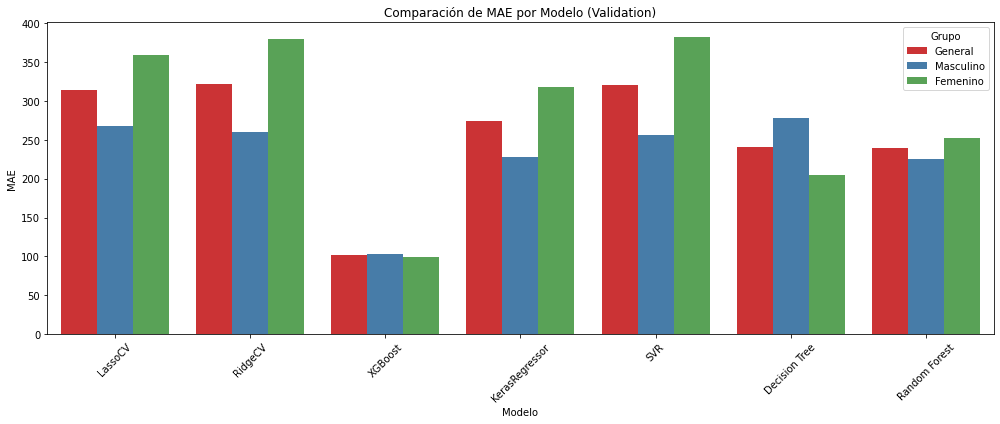

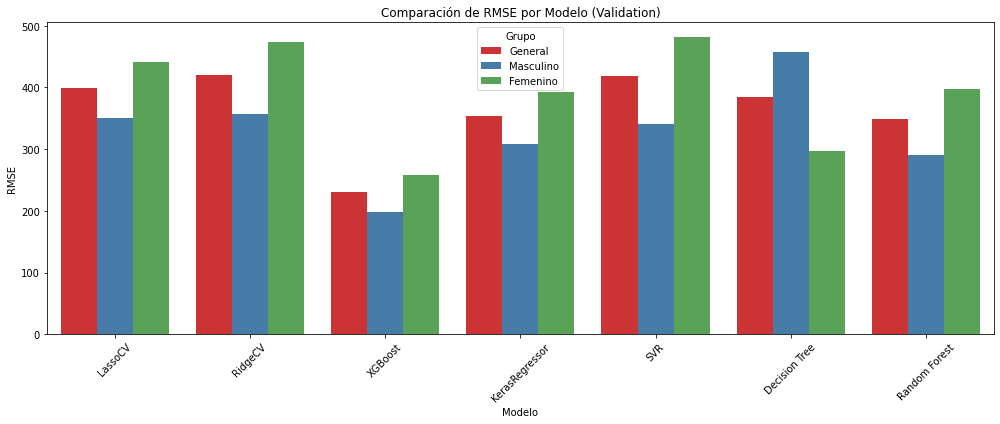

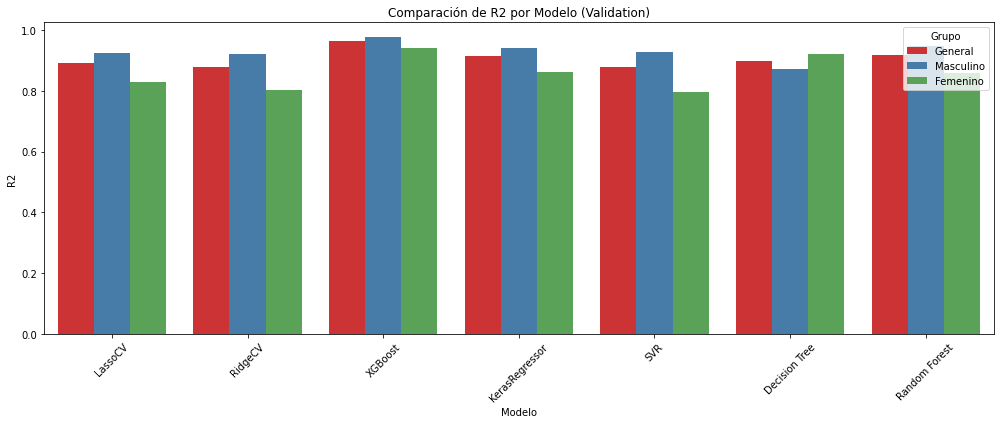

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que estos DataFrames estén cargados
# df_generales = ...
# df_genero_texto = ...

# Separar y copiar los subconjuntos
df_masculino = df_genero_texto[df_genero_texto['Modelo'].str.contains('Masculino')].copy()
df_femenino = df_genero_texto[df_genero_texto['Modelo'].str.contains('Femenino')].copy()
df_generales = df_generales.copy()  # Por si acaso

# Asignar el grupo correctamente
df_generales['Grupo'] = 'General'
df_masculino['Grupo'] = 'Masculino'
df_femenino['Grupo'] = 'Femenino'

# Extraer nombre base del modelo
modelo_regex = r'(LassoCV|RidgeCV|XGBoost|KerasRegressor|SVR|Decision Tree|Random Forest)'

df_generales['Modelo_Base'] = df_generales['Modelo'].str.extract(modelo_regex)
df_masculino['Modelo_Base'] = df_masculino['Modelo'].str.extract(modelo_regex)
df_femenino['Modelo_Base'] = df_femenino['Modelo'].str.extract(modelo_regex)

# Unir todo
df_total = pd.concat([df_generales, df_masculino, df_femenino], ignore_index=True)

# Colores para cada grupo
colores = {'General': 'steelblue', 'Masculino': 'forestgreen', 'Femenino': 'darkorange'}

# Métricas a graficar
metricas = ['mae', 'rmse', 'r2']

# Gráficas por métrica (Test)
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data = df_total[
    (df_total['Tipo'] == 'Validation') |
    (df_total['Tipo'] == 'Ridge Validation') |
    (df_total['Tipo'] == 'Lasso Validation')
],
        x='Modelo_Base',
        y=metrica,
        hue='Grupo',
        palette="Set1"
    )
    plt.title(f'Comparación de {metrica.upper()} por Modelo (Validation)')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Grupo')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [90]:
df_total

,Modelo,Tipo,mae,mse,rmse,r2,Grupo,Modelo_Base
0,LassoCV Train,Train,326.927801,186753.392724,432.149734,0.868229,General,LassoCV
1,LassoCV Test,Test,353.170175,195525.561853,442.182725,0.860752,General,LassoCV
2,LassoCV Validation,Validation,314.079941,159342.303879,399.177033,0.890527,General,LassoCV
3,RidgeCV Train,Train,314.876704,165764.110331,407.141389,0.883039,General,RidgeCV
4,RidgeCV Test,Test,353.810061,197858.639107,444.813038,0.859090,General,RidgeCV
5,RidgeCV Validation,Validation,321.557076,176829.863971,420.511431,0.878512,General,RidgeCV
6,XGBoost Train,Train,1.865034,7.256602,2.693808,0.999995,General,XGBoost
7,XGBoost Test,Test,119.557137,68679.782377,262.068278,0.951088,General,XGBoost
8,XGBoost Validation,Validation,101.665905,53308.975072,230.887364,0.963375,General,XGBoost
9,KerasRegressor Train,Train,265.033838,166794.168491,408.404418,0.882312,General,KerasRegressor


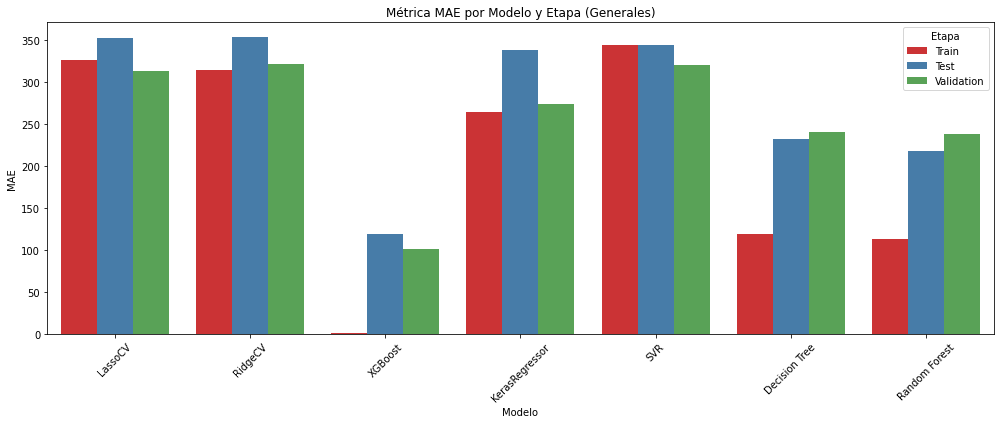

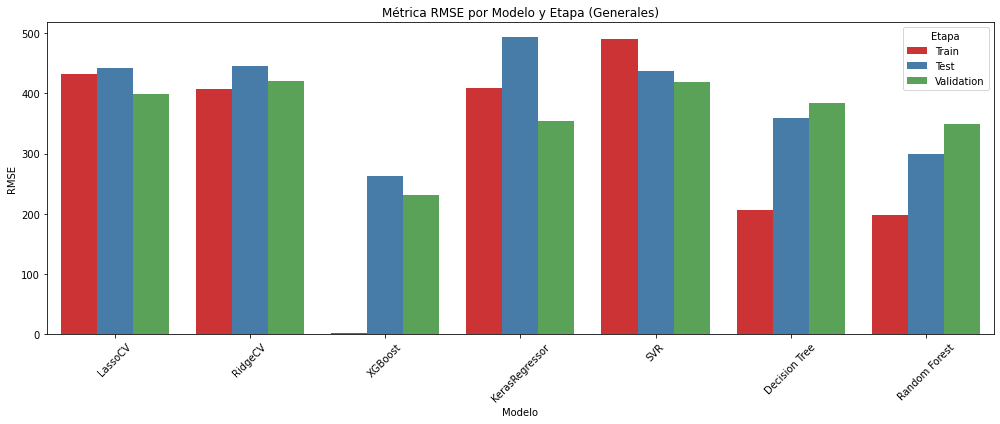

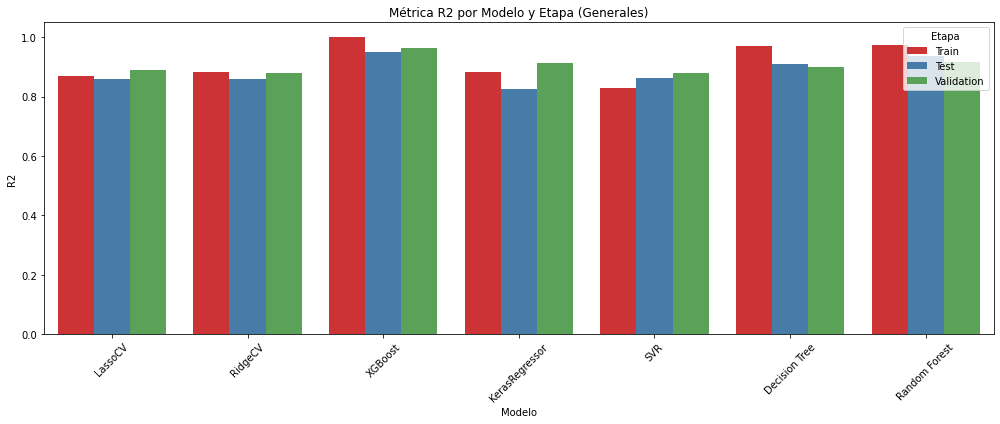

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo datos generales por etapa
df_generales_etapas = df_total[
    (df_total['Grupo'] == 'General') &
    (df_total['Tipo'].isin(['Train', 'Test', 'Validation']))
]

# Métricas a graficar
metricas = ['mae', 'rmse', 'r2']

# Gráficas por métrica
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=df_generales_etapas,
        x='Modelo_Base',
        y=metrica,
        hue='Tipo',
        palette='Set1'
    )
    plt.title(f'Métrica {metrica.upper()} por Modelo y Etapa (Generales)')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Etapa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


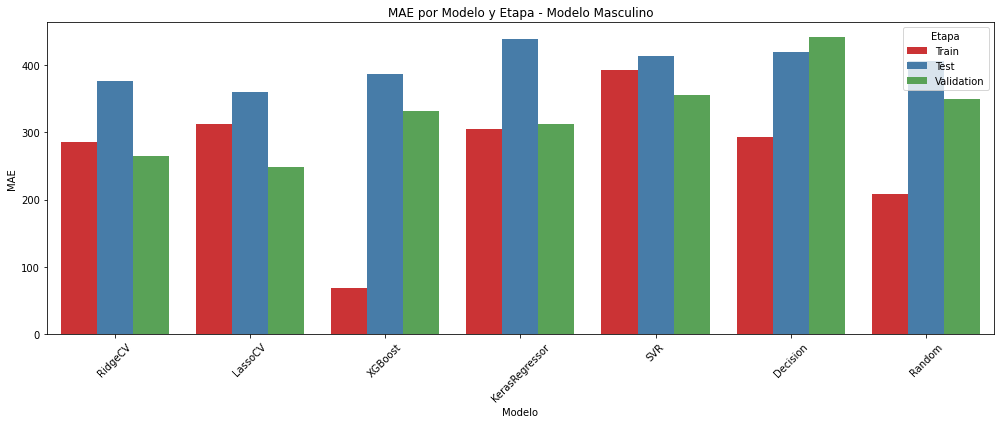

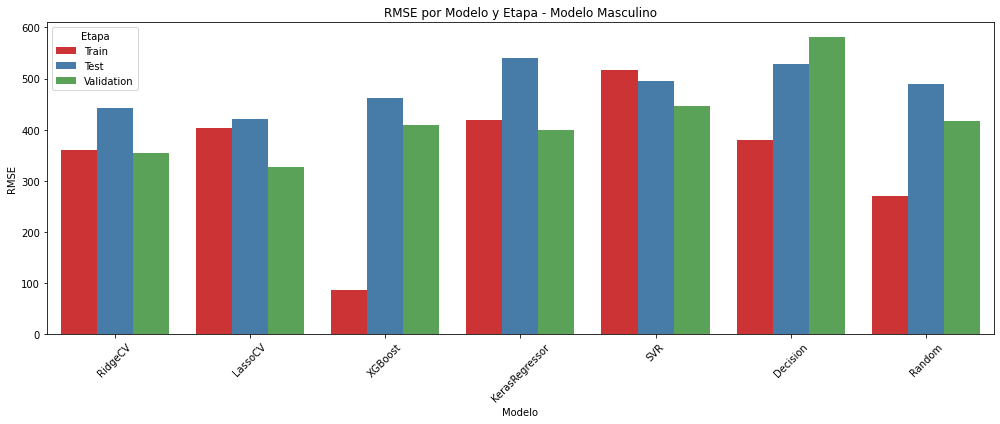

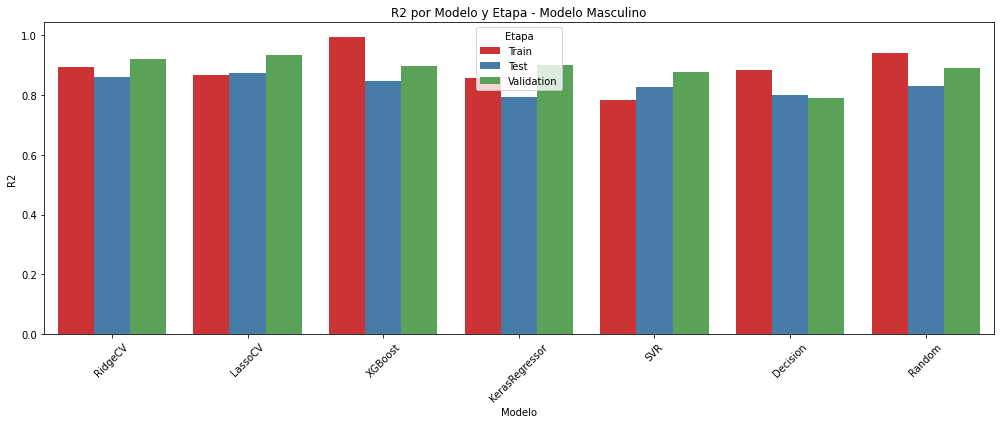

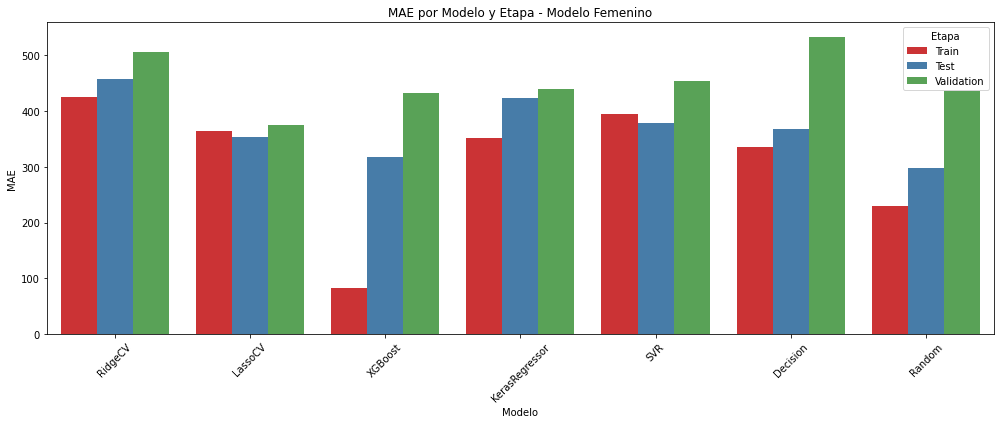

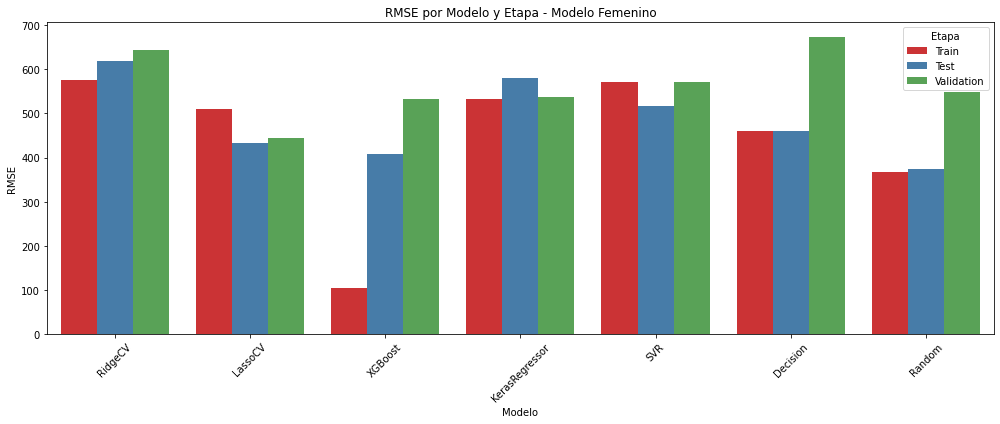

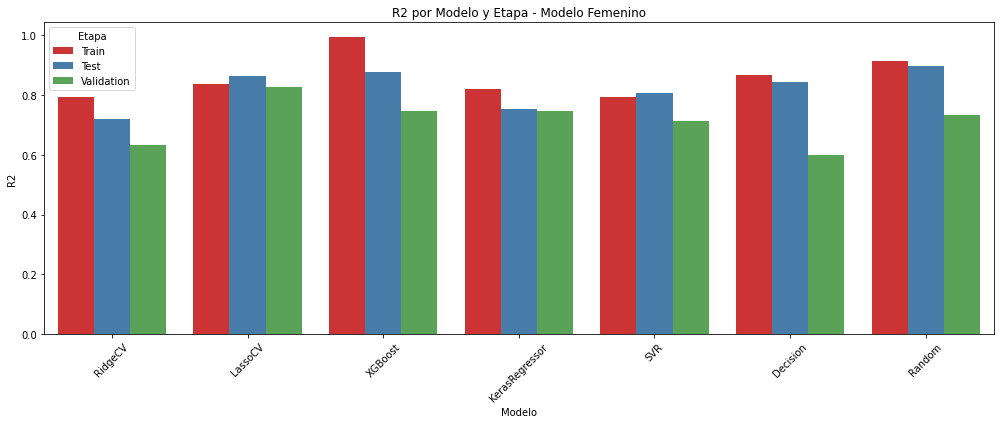

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Separar los modelos por género
df_m = df_genero_guionbajo[df_genero_guionbajo['Modelo'].str.contains('_m', case=False)].copy()
df_f = df_genero_guionbajo[df_genero_guionbajo['Modelo'].str.contains('_f', case=False)].copy()

# Extraer nombre base del modelo
df_m['Modelo_Base'] = df_m['Modelo'].str.extract(r'^([A-Za-z]+)')
df_f['Modelo_Base'] = df_f['Modelo'].str.extract(r'^([A-Za-z]+)')

# Definir métricas
metricas = ['mae', 'rmse', 'r2']

# --------- GRÁFICAS PARA MODELOS MASCULINOS (_m) ---------
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=df_m[df_m['Tipo'].isin(['Train','Test', 'Validation'])],
        x='Modelo_Base',
        y=metrica,
        hue='Tipo',
        palette='Set1'
    )
    plt.title(f'{metrica.upper()} por Modelo y Etapa - Modelo Masculino')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Etapa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# --------- GRÁFICAS PARA MODELOS FEMENINOS (_f) ---------
for metrica in metricas:
    plt.figure(figsize=(14, 6))
    sns.barplot(
        data=df_f[df_f['Tipo'].isin(['Train','Test', 'Validation'])],
        x='Modelo_Base',
        y=metrica,
        hue='Tipo',
        palette='Set1'
    )
    plt.title(f'{metrica.upper()} por Modelo y Etapa - Modelo Femenino')
    plt.ylabel(metrica.upper())
    plt.xlabel('Modelo')
    plt.legend(title='Etapa')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [93]:
from collections import defaultdict

# Función para clasificar por rango de edad
def dias_a_rango(dias):
    años = dias // 365
    if años <= 2:
        return "0-2"
   # if años <= 4:
    #    return "3-4"
    #if años <= 6:
     #   return "5-6"
    if años <= 8:
        return "3-8"
    #elif años <= 10:
     #   return "9-10"
    #if años <= 12:
     #   return "11-12"

    elif años <= 14:
        return "9-14"
    ##if años <= 16:
        return "15-16"
    elif años <= 18:
        return "15-18"
    else:
        return "19+"

# Función para separar por rango
def separar_por_rango(x, y):
    subconjuntos = defaultdict(lambda: {"x": [], "y": []})
    
    for xi, yi in zip(x, y):
        #print(f"Edad: {yi} días, Rango: {dias_a_rango(yi)}")
        rango = dias_a_rango(yi)
        subconjuntos[rango]["x"].append(xi)
        subconjuntos[rango]["y"].append(yi)
    
    return subconjuntos

subconjuntos = separar_por_rango(x_train, y_train)

for rango, datos in subconjuntos.items():
    print(f"Rango {rango} - Cantidad: {len(datos['y'])}")
    y_validation_pred=lasso_cv_f.predict(datos['x'])
    calcular_metricas(y_validation_pred,datos['y'], conjunto='AGE', model='Lasso_cv age')

Rango 9-14 - Cantidad: 91
--- Métricas para AGE ---
MAE:  319.4175
MSE:  168725.6240
RMSE: 410.7622
R²:   0.5747

Rango 3-8 - Cantidad: 47
--- Métricas para AGE ---
MAE:  344.2784
MSE:  198047.3103
RMSE: 445.0251
R²:   0.4706

Rango 15-18 - Cantidad: 16
--- Métricas para AGE ---
MAE:  494.1804
MSE:  314306.8002
RMSE: 560.6307
R²:   -1.4672

Rango 19+ - Cantidad: 1
--- Métricas para AGE ---
MAE:  3279.1121
MSE:  10752576.3666
RMSE: 3279.1121
R²:   nan



c:\Users\JUAN\.conda\envs\PDG\lib\site-packages\sklearn\metrics\_regression.py:682: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [94]:
y_validation_pred=mlp_g.predict(x_train)
calcular_metricas(y_train, y_validation_pred, conjunto='AGE', model='Lasso_cv age')

--- Métricas para AGE ---
MAE:  288.1545
MSE:  206379.1532
RMSE: 454.2897
R²:   0.8705



In [95]:
print(selected_features_g)

                                    Feature  Coefficient
1                    Edad Cronológica(días)   882.245694
10                original_shape_Sphericity  -304.532297
3            original_shape_MajorAxisLength  -217.912082
0                              Género(0; 1)   139.861980
5       original_shape_Maximum2DDiameterRow   127.835900
8                 original_shape_MeshVolume   108.477184
49                        original_glcm_Idn    88.974718
37                   original_glcm_Contrast    87.285958
16               original_firstorder_Energy   -53.754324
28             original_firstorder_Skewness   -40.451962
24              original_firstorder_Minimum   -33.908499
9            original_shape_MinorAxisLength   -28.622893
85              original_glszm_ZoneVariance   -13.318719
77  original_glszm_LowGrayLevelZoneEmphasis    -6.633830


In [96]:
print(len(selected_features_g))

14


In [97]:
print(selected_features_m)

                                              Feature  Coefficient
1                              Edad Cronológica(días)   821.361152
10                          original_shape_Sphericity  -280.147220
3                      original_shape_MajorAxisLength  -233.527071
8                           original_shape_MeshVolume   164.131086
0                                        Género(0; 1)   111.188904
37                             original_glcm_Contrast    68.898089
75      original_glszm_LargeAreaHighGrayLevelEmphasis    60.663654
99  original_gldm_SmallDependenceLowGrayLevelEmphasis    44.917334
4              original_shape_Maximum2DDiameterColumn   -43.591437
5                 original_shape_Maximum2DDiameterRow    32.612471
38                          original_glcm_Correlation    12.626246
76       original_glszm_LargeAreaLowGrayLevelEmphasis    10.761889
25                          original_firstorder_Range     9.602655
94  original_gldm_LargeDependenceHighGrayLevelEmph...     6.01

In [98]:
print(len(selected_features_m))

14


In [99]:
print(selected_features_f)

                      Feature  Coefficient
1      Edad Cronológica(días)   887.514022
10  original_shape_Sphericity  -211.732760
0                Género(0; 1)    36.335701


In [100]:
print(len(selected_features_f))

3


In [103]:
# Guardar todos los modelos
import joblib
# Guardar modelos masculinos
joblib.dump(lasso_cv_m, 'lasso_cv_m.pkl')
joblib.dump(ridge_cv_m, 'ridge_cv_m.pkl')
joblib.dump(model_xgb_m, 'xgboost_m.pkl')
#joblib.dump(mlp_m, 'mlp_m.pkl')
joblib.dump(svr_m, 'svr_m.pkl')
joblib.dump(decision_tree_m, 'decision_tree_m.pkl')
joblib.dump(random_forest_m, 'random_forest_m.pkl')
# Guardar modelos femeninos
joblib.dump(lasso_cv_f, 'lasso_cv_f.pkl')
joblib.dump(ridge_cv_f, 'ridge_cv_f.pkl')
joblib.dump(model_xgb_f, 'xgboost_f.pkl')
joblib.dump(mlp_f, 'mlp_f.pkl')
joblib.dump(svr_f, 'svr_f.pkl')
joblib.dump(decision_tree_f, 'decision_tree_f.pkl')
joblib.dump(random_forest_f, 'random_forest_f.pkl')
# Guardar modelos generales
joblib.dump(lasso_cv, 'lasso_cv.pkl')
joblib.dump(ridge_cv, 'ridge_cv.pkl')
joblib.dump(model_xgb_g, 'xgboost_g.pkl')
#joblib.dump(mlp_g, 'mlp_g.pkl')
joblib.dump(svr_g, 'svr_g.pkl')
joblib.dump(decision_tree_g, 'decision_tree_g.pkl')
joblib.dump(random_forest_g, 'random_forest_g.pkl')#

# Guardar los StandardScaler
joblib.dump(scaler_m, 'scaler_m.pkl')
joblib.dump(scaler_f, 'scaler_f.pkl')
joblib.dump(scaler, 'scaler.pkl')


INFO:tensorflow:Assets written to: C:\Users\JUAN\AppData\Local\Temp\tmpo4gzz7vp\assets


['scaler.pkl']